In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [5]:
#df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df = pd.read_csv('Walmart.csv')

In [6]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

In [9]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


[]

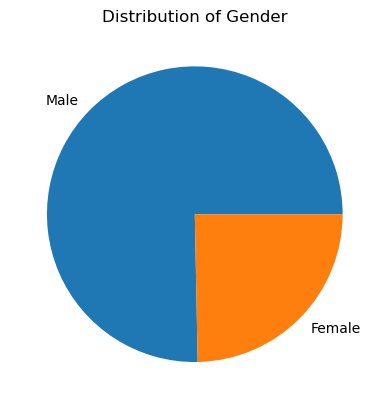

In [10]:
Male = df[df['Gender']=='M'].size
Female = df[df['Gender']=='F'].size

arr = [Male,Female]
label = ['Male','Female']
plt.pie(arr,labels = label)
plt.title('Distribution of Gender')
plt.plot()

<Axes: xlabel='Gender', ylabel='count'>

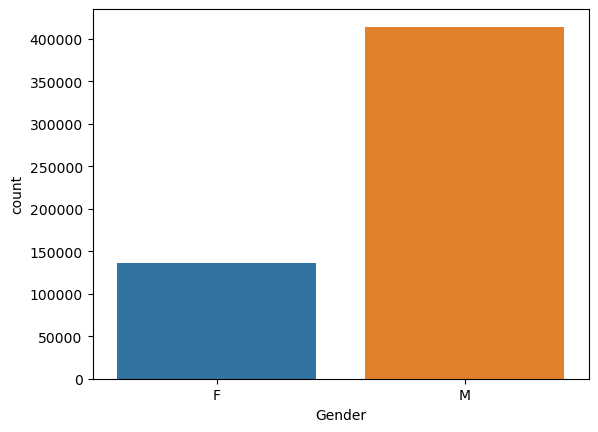

In [11]:
sns.countplot(data = df , x ='Gender',hue = 'Gender')

In [12]:
for i in df.columns:
    print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [13]:
#Outlier Detection and removal
def rem_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    lower_arr = np.where(df[col] <= lower)[0]
    Upper_arr = np.where(df[col] >= upper)[0]
    df.drop(index = lower_arr,inplace = True)
    df.drop(index = Upper_arr,inplace = True)
    sns.boxplot(df[col])

<Axes: ylabel='Product_Category'>

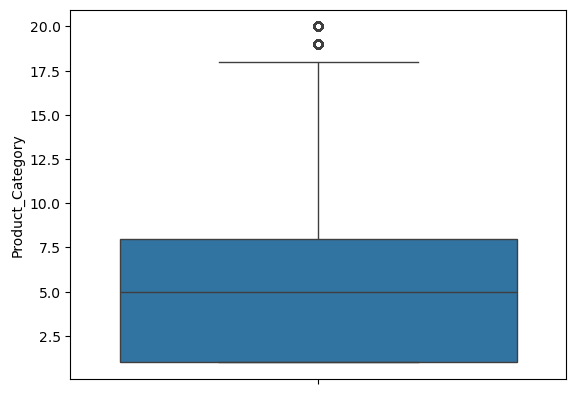

In [14]:
sns.boxplot(df['Product_Category'])

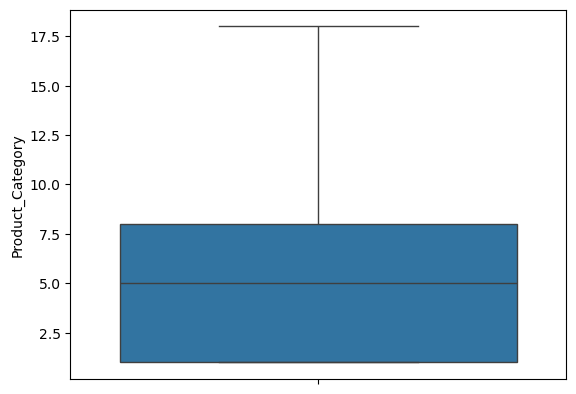

In [15]:
rem_outlier('Product_Category')

<Axes: ylabel='Occupation'>

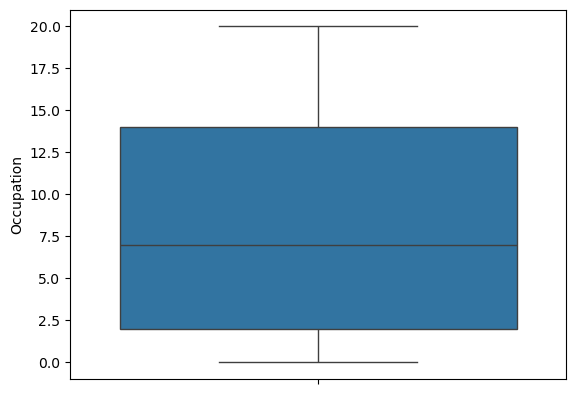

In [16]:
sns.boxplot(df['Occupation'])

<Axes: ylabel='Purchase'>

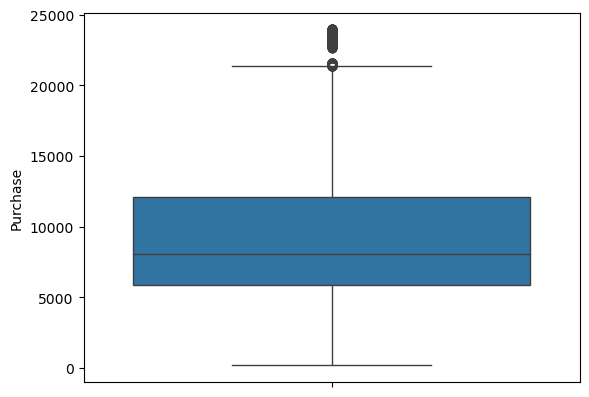

In [17]:
sns.boxplot(df['Purchase'])

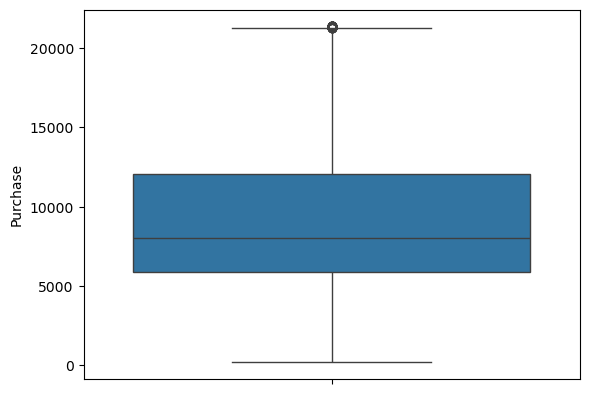

In [18]:
rem_outlier('Purchase')

In [19]:
df['Gender'].value_counts()

Gender
M    409168
F    134042
Name: count, dtype: int64

<Axes: xlabel='Purchase', ylabel='Density'>

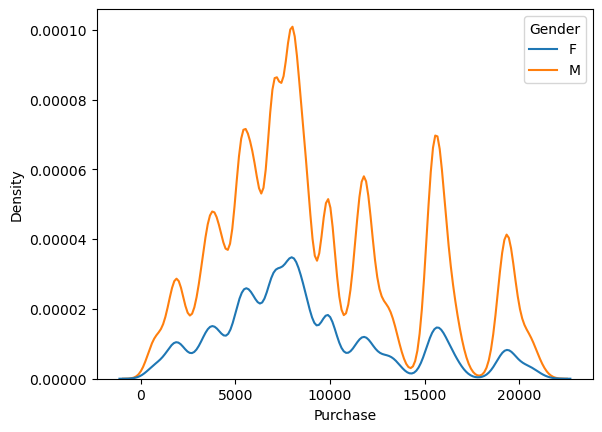

In [20]:
#Bi Variate ['Purchase','Occupation','Product_Category']
sns.kdeplot(data = df,x = 'Purchase',hue = 'Gender')

<Axes: xlabel='Gender', ylabel='Purchase'>

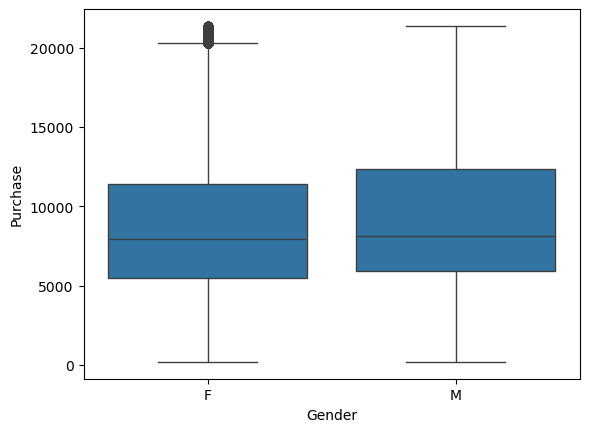

In [21]:
sns.boxplot(data = df , x = 'Gender', y = 'Purchase' )

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543210 entries, 0 to 545914
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     543210 non-null  int64 
 1   Product_ID                  543210 non-null  object
 2   Gender                      543210 non-null  object
 3   Age                         543210 non-null  object
 4   Occupation                  543210 non-null  int64 
 5   City_Category               543210 non-null  object
 6   Stay_In_Current_City_Years  543210 non-null  object
 7   Marital_Status              543210 non-null  int64 
 8   Product_Category            543210 non-null  int64 
 9   Purchase                    543210 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 45.6+ MB


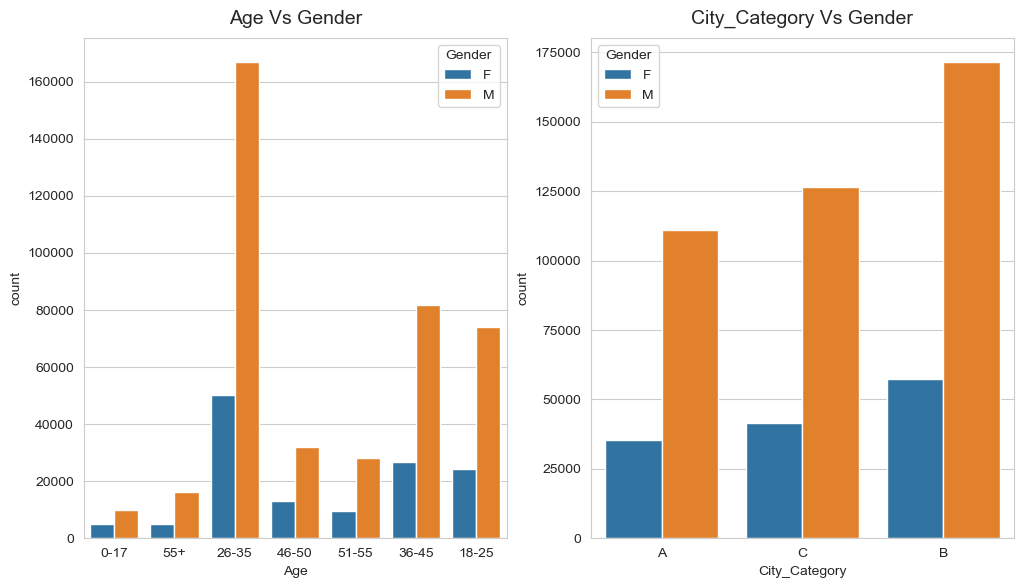

In [23]:
sns.set_style(style='whitegrid')
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6.5))
sns.countplot(data = df , x = 'Age' , hue = 'Gender' ,ax = axs[0])
sns.countplot(data = df , x = 'City_Category' , hue = 'Gender' ,ax = axs[1])
axs[0].set_title('Age Vs Gender',pad = 10 ,fontsize = 14)
axs[1].set_title('City_Category Vs Gender',pad = 10 ,fontsize = 14)
plt.show()

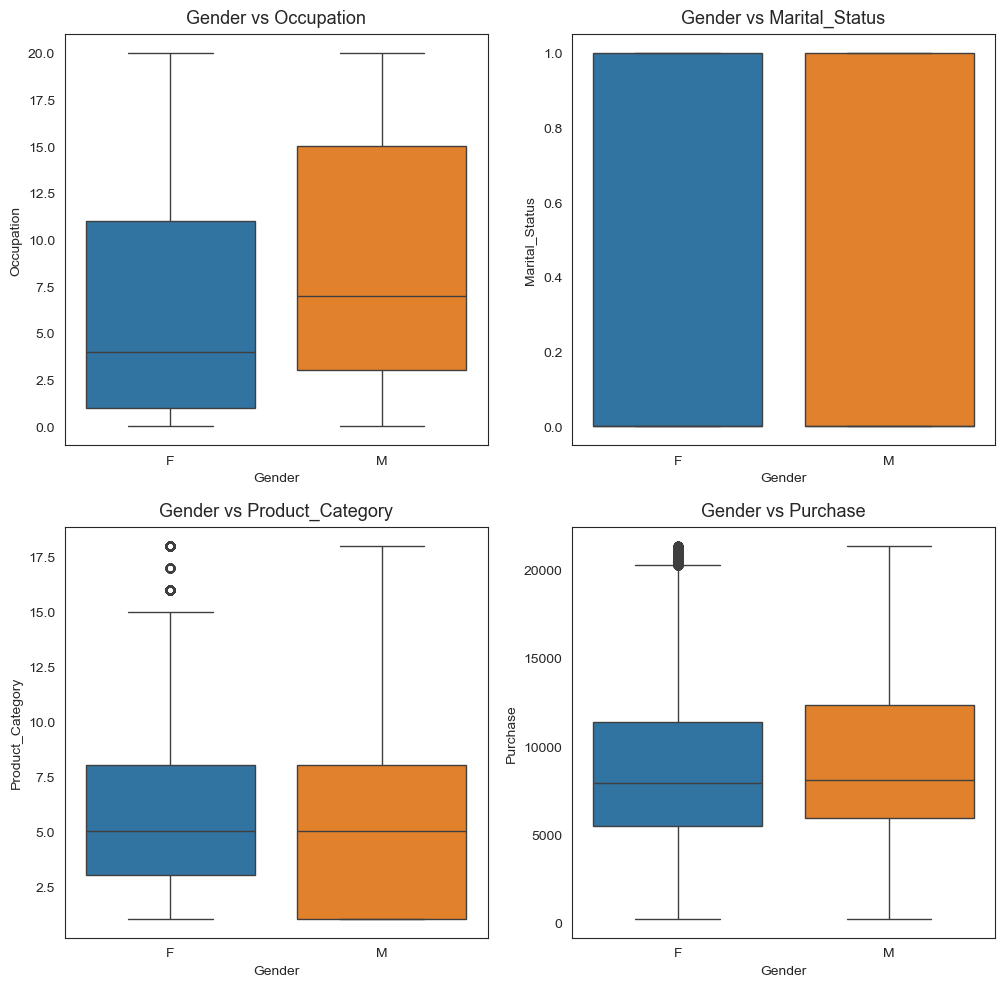

In [24]:
attr = ['Occupation','Marital_Status','Product_Category','Purchase']
sns.set_style('white')
fig,axs = plt.subplots(nrows = 2 , ncols = 2 , figsize=(12,6.5))
fig.subplots_adjust(top = 1.5)
count = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data = df, x = 'Gender' , y = attr[count],ax = axs[i,j], hue = 'Gender')
        axs[i,j].set_title("Gender vs "+attr[count],pad = 8 ,fontsize = 13)
        count += 1

In [25]:
#features = ['Product_Category','Age','Occupation']
def plot_pie(column):
    arr = df.groupby(column)[column].count()
    label = arr.index
    plt.pie(arr, labels = label)
    plt.title('Distribution for '+column)
    plt.show()

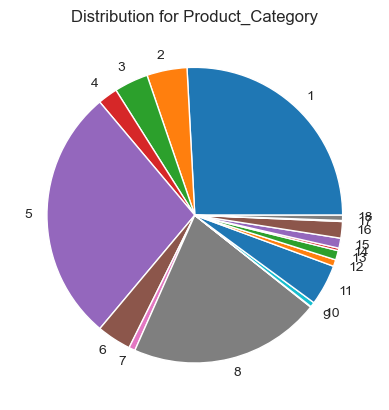

In [26]:
plot_pie('Product_Category')

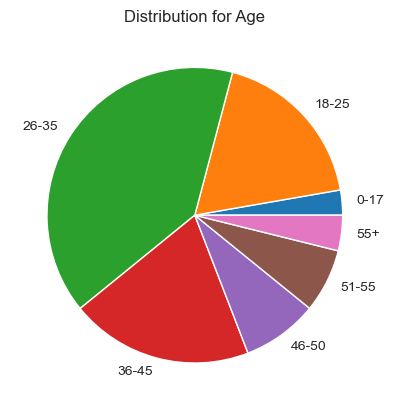

In [27]:
plot_pie('Age')

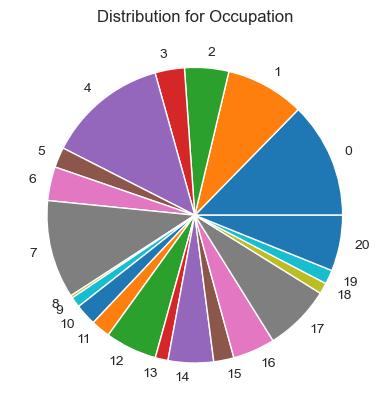

In [28]:
plot_pie('Occupation')

<Axes: xlabel='Product_Category', ylabel='Purchase'>

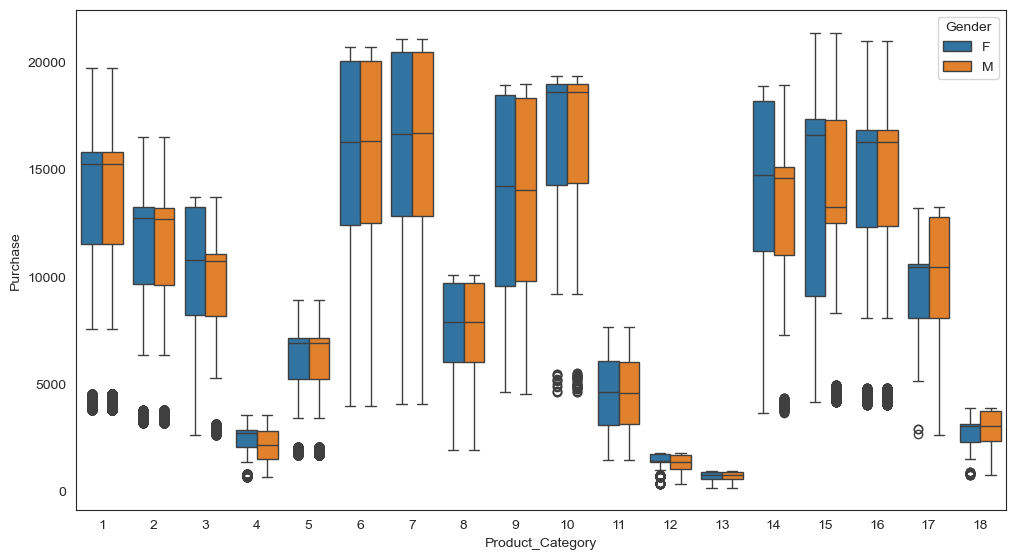

In [29]:
fig,axs = plt.subplots(nrows = 1 , ncols = 1 , figsize=(12,6.5))
sns.boxplot(data = df , x = 'Product_Category', y = 'Purchase',  hue = 'Gender')

<Axes: xlabel='Age', ylabel='Purchase'>

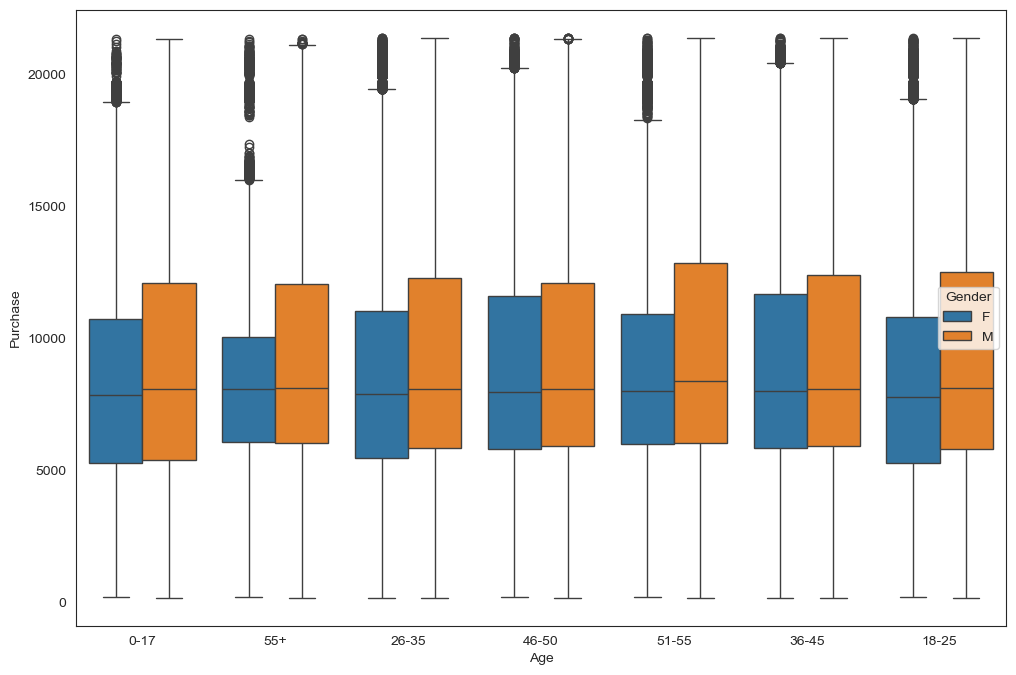

In [30]:
fig,axs = plt.subplots(nrows = 1 , ncols = 1 , figsize=(12,8))
sns.boxplot(data = df , x = 'Age', y = 'Purchase',  hue = 'Gender')

<Axes: xlabel='City_Category', ylabel='Purchase'>

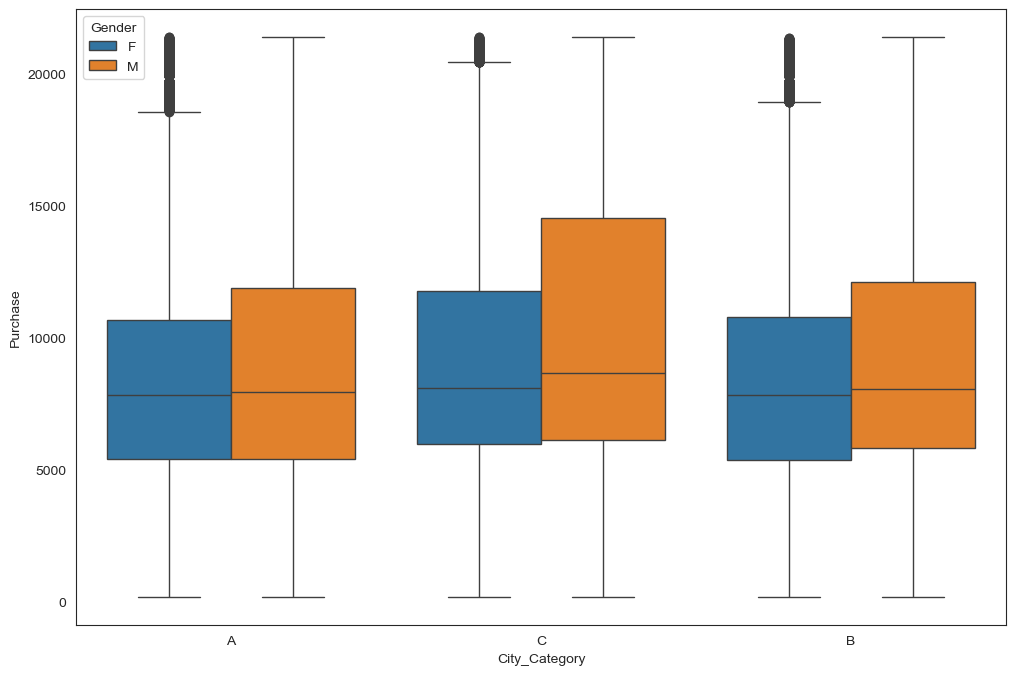

In [31]:
fig,axs = plt.subplots(nrows = 1 , ncols = 1 , figsize=(12,8))
sns.boxplot(data = df , x = 'City_Category', y = 'Purchase',  hue = 'Gender')

We can see that City C has the highest number of purchases for both Males and Females.
Product category 1,8 and 5 are most popular.
product category 14,15 are bought by females more and this categories including category of 6 and 7 have a diverse price range.
26-35 , 18-25, 36-45 are the most popular age group of customers.
and in all this three categories on average men bought more costly products then Females.

Hence, from the above analysis we can say that there are more male customers then female customers overall.

In [56]:
df.Gender.value_counts(normalize = True)

Gender
M    0.753241
F    0.246759
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='City_Category'>

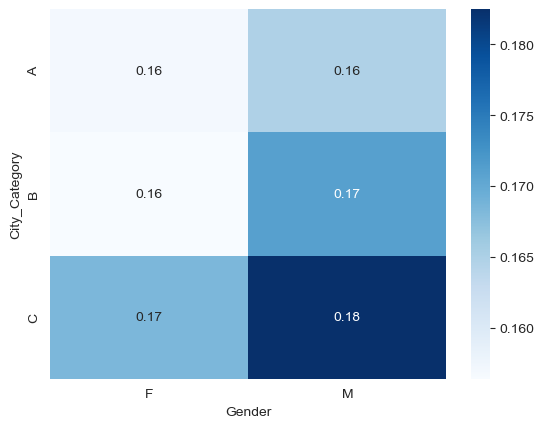

In [65]:
ctab = pd.crosstab(df.City_Category,df.Gender,values = df.Purchase,aggfunc = 'mean',normalize = True)
sns.heatmap(ctab, cmap = 'Blues',annot=True)

<Axes: xlabel='Gender', ylabel='Age'>

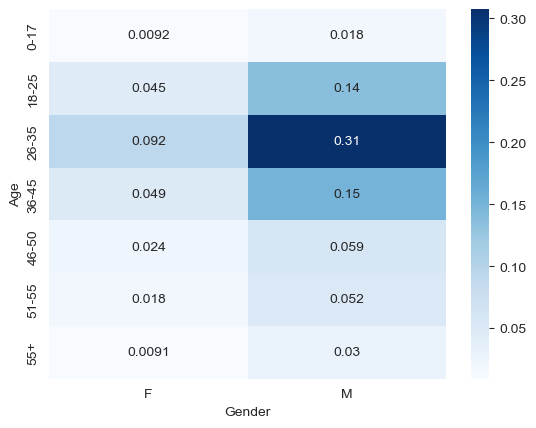

In [68]:
ctab = pd.crosstab(df.Age,df.Gender,normalize = True)
sns.heatmap(ctab, cmap = 'Blues',annot=True)

<Axes: >

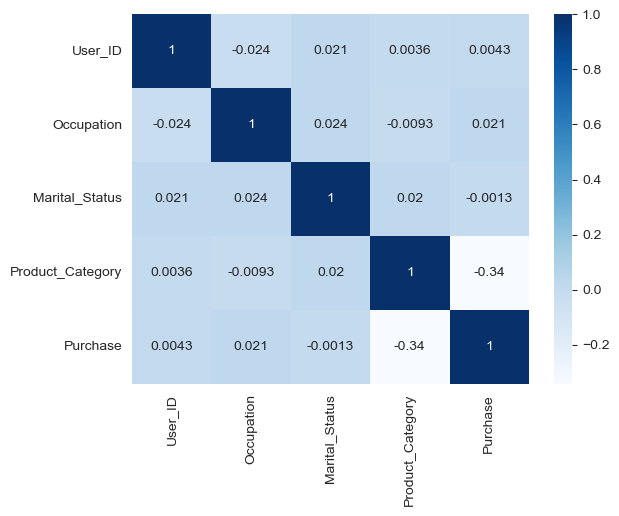

In [83]:
sns.heatmap(df.select_dtypes('number').corr(), cmap = 'Blues',annot=True)

<Axes: xlabel='Gender', ylabel='Occupation'>

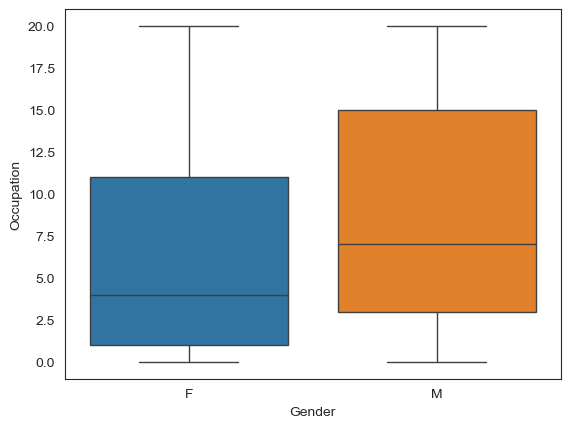

In [85]:
sns.boxplot(data = df, x = 'Gender' , y = 'Occupation', hue = 'Gender')

In [86]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8744.483475
M    9433.466187
Name: Purchase, dtype: float64

As we can see occupation and purchase have positive correlation, in above analysis we can see that females have lower occupation on average then men, it might be the reason for 
females to spend less per transaction then men.

In [40]:
def bootstraped_resampling(sample,n):
    bootstrapped_means_list = []
    for i in range(10000):
        bootstrapped_samples = np.random.choice(sample,size = n)
        bootstrapped_mean = np.mean(bootstrapped_samples)
        bootstrapped_means_list.append(bootstrapped_mean)
    return bootstrapped_means_list

In [41]:
Male_samples = df[df['Gender']=='M']['Purchase']
Female_samples = df[df['Gender']=='F']['Purchase']

size_Male_samples = len(Male_samples)
size_FeMale_samples = len(Female_samples)
#BootStrap method

bootstrap_male_means = bootstraped_resampling(Male_samples,size_Male_samples)
bootstrap_Female_means = bootstraped_resampling(Female_samples,size_FeMale_samples)


<Axes: ylabel='Count'>

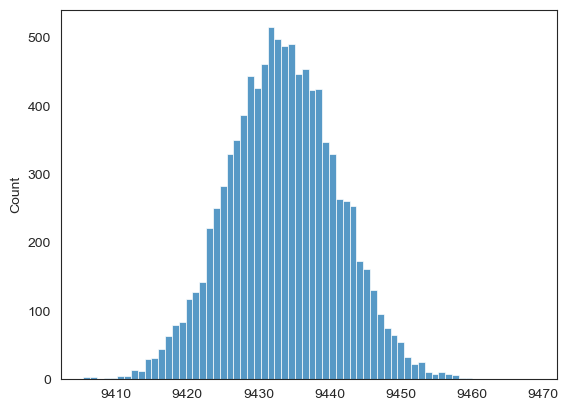

In [43]:
sns.histplot(bootstrap_male_means)

<Axes: ylabel='Count'>

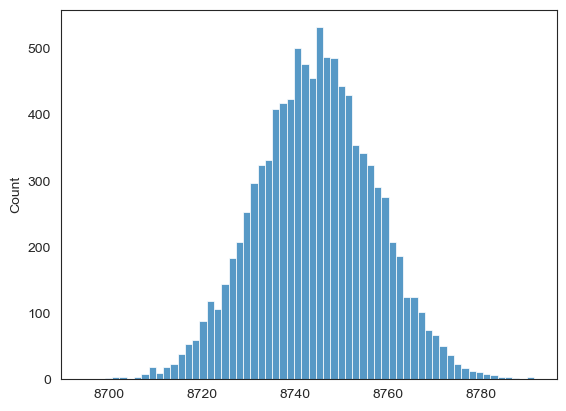

In [45]:
sns.histplot(bootstrap_Female_means)

In [70]:
print('95% Confidence Interval for Male customer purchase [',round(np.percentile(bootstrap_male_means,2.5),2),',',round(np.percentile(bootstrap_male_means,97.5),2),']')
print('95% Confidence Interval for FeMale customer purchase[',round(np.percentile(bootstrap_Female_means,2.5),2),',',round(np.percentile(bootstrap_Female_means,97.5),2),']')

95% Confidence Interval for Male customer purchase [ 9418.39 , 9448.57 ]
95% Confidence Interval for FeMale customer purchase[ 8719.67 , 8769.39 ]


In [74]:
#CLT method
def clt_CI(mean, std, N, prob):
    std_err = std / np.sqrt(N)
    print("SE ", std_err)
    slice = (1 - (prob/100))/2
    print("slice ", slice)
    z1 = norm.ppf(slice)
    print("z1 ", z1)
    z2 = norm.ppf(1-slice)
    print("z2 ", z2)
    x1 = mean + ( z1 * std_err)
    x2 = mean + ( z2 * std_err)
    return round(x1,2), round(x2,2)

In [81]:
print('CI for Male Customers')
clt_CI(9433.466187,4965.585648,409168,95)

CI for Male Customers
SE  7.762822330795274
slice  0.025000000000000022
z1  -1.959963984540054
z2  1.959963984540054


(9418.25, 9448.68)

In [79]:
print('CI for Female Customers')
clt_CI(8744.483475,4631.769981,134042,95)

CI for Female Customers
SE  12.65104889088314
slice  0.025000000000000022
z1  -1.959963984540054
z2  1.959963984540054


(8719.69, 8769.28)

Hence, from the above calculation we can conclude with 95% confidence that Males will spend more then Females.